Meraj Patel

<h1><center>Comparing performance of Ensembled models to Regular models </center></h1>

In [1]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True) 
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

# Import mushroom dataset
df = pd.read_csv("mushroom_dataset.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Overview

In [2]:
df.shape

(8124, 23)

In [3]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

col_class = df.columns[0]
col_nominal =  df.columns[1:].values

# Onehot Encode nominal columns
df = pd.get_dummies(df, columns=col_nominal)

# LabelEncode class
le = LabelEncoder()
df[col_class] = le.fit_transform(df[col_class])
df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

col_class = df.columns[0]
col_nominal =  df.columns[1:].values

X_train, X_test, y_train, y_test = train_test_split(df[col_nominal], df[col_class], test_size=0.2, random_state=0)

# Sanity check: RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RandomForestClassifier Accuracy Score: ", accuracy_score(y_pred, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))

RandomForestClassifier Accuracy Score:  1.0
Confusion Matrix:
 [[852   0]
 [  0 773]]


### 10-fold CV performances of GaussianNB, linear SVC, MLPClassifier, DecisionTreeClassifier, and RandomForestClassifier with default parameters

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

def evaluate_model(_model, _X, _y, text=''):
    accs = []
    kf = StratifiedKFold(n_splits=10, shuffle=False)
    for train_idx, test_idx in kf.split(_X, _y):
        model = _model.fit(_X[train_idx], _y[train_idx])
        y_pred = model.predict(_X[test_idx])
        accs.append(accuracy_score(_y[test_idx], y_pred))
    
    print(f'{text:>20s} Stratified 10-fold CV acc={np.mean(accs):.3f}')

X = np.array(df.drop(columns=col_class))
y = np.array(df[col_class])

evaluate_model(GaussianNB(), X, y, 'GaussianNB')  
evaluate_model(SVC(kernel='linear', probability=True), X, y, 'SVC') 
evaluate_model(MLPClassifier(), X, y, 'MLPClassifier')
evaluate_model(DecisionTreeClassifier(), X, y, 'DecisionTreeClassifier')
evaluate_model(RandomForestClassifier(), X, y, 'RandomForestClassifier')  

          GaussianNB Stratified 10-fold CV acc=0.915
                 SVC Stratified 10-fold CV acc=0.983
       MLPClassifier Stratified 10-fold CV acc=0.963
DecisionTreeClassifier Stratified 10-fold CV acc=0.968
RandomForestClassifier Stratified 10-fold CV acc=0.967


### Generate an ensemble of 100 classifiers for each of the four classifier above

In [8]:
nb = [GaussianNB() for i in range(100)]
svc = [SVC(kernel='linear', probability=True) for i in range(100)]
nn = [MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol=1e-1) for i in range(100)]
dt = [DecisionTreeClassifier(max_depth=5, max_features=5) for i in range(100)]

evaluate_model(nb[0], X, y, 'GaussianNB')  
evaluate_model(svc[0], X, y, 'SVC') 
evaluate_model(nn[0], X, y, 'MLPClassifier')
evaluate_model(dt[0], X, y, 'DecisionTreeClassifier')

          GaussianNB Stratified 10-fold CV acc=0.915
                 SVC Stratified 10-fold CV acc=0.983
       MLPClassifier Stratified 10-fold CV acc=0.891
DecisionTreeClassifier Stratified 10-fold CV acc=0.890


### Create function ensemble_fit() to receive the ensemble and train on one of the subsets of the training data -  each classifier will see only a different subset of the training dataset, also called as subsampling the input data for training.

In [9]:
from random import sample 

# Randomly select N rows from dataset _X and ensure subset contain both class 0,1
def n_subset(_X, _y, _n_rows):
    rows = [i for i in range (_X.shape[0])]
    classCheck = True
    while classCheck:
        # Fetch indicies of rows
        idx = sample(rows, _n_rows)
        # Ensure rows of both classes are captured
        if len(np.unique(_y[idx])) == 2:
            classCheck = False
    return(idx)

# Fit ensemble according to randomly selected features
def ensemble_fit(_models, _X, _y, _n_rows):
    ensemble_clf = []
    for model in _models:
        # Train model on subset of rows
        rows = n_subset(_X, _y, _n_rows)
        clf = model.fit(_X[rows, :], _y[rows])
        ensemble_clf.append(clf)
    return(ensemble_clf)

### Create function ensemble_predict() to receive the trained ensemble and test on the input. Use a voting scheme on the returned predictions by c.predict() by each of the weak classifier. Final prediction is np.argmax() of those counts

In [10]:
# Use ensemble to predict y given _X and append accuracy score
def ensemble_predict(_ensemble_clf, _X, _y):
    accs = []
    for clf in _ensemble_clf:
        y_pred = clf.predict(_X)
        accs.append(accuracy_score(_y, y_pred))
    return accs

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into test and train sets
X = np.array(df.drop(columns=col_class))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of N rows to randomly select per model in ensemble
n_rows = 400

# Naive Bates
ensemble_nb = ensemble_fit(nb, X_train, y_train, n_rows)
accs_nb = ensemble_predict(ensemble_nb, X_test, y_test)
# SVC
ensemble_svc = ensemble_fit(svc, X_train, y_train, n_rows)
accs_svc = ensemble_predict(ensemble_svc, X_test, y_test)
# Neural Network
ensemble_nn = ensemble_fit(nn, X_train, y_train, n_rows)
accs_nn = ensemble_predict(ensemble_nn, X_test, y_test)
# Decision Tree
ensemble_dt = ensemble_fit(dt, X_train, y_train, n_rows)
accs_dt = ensemble_predict(ensemble_dt, X_test, y_test)

Subset sample size: 400
Naive Bayes Accuracy (majority vote): 0.8835692307692308
SVM Accuracy (majority vote): 0.9979076923076923
Neural Network Accuracy (majority vote): 0.4801846153846154
Decision Tree Accuracy (majority vote): 0.9161846153846154


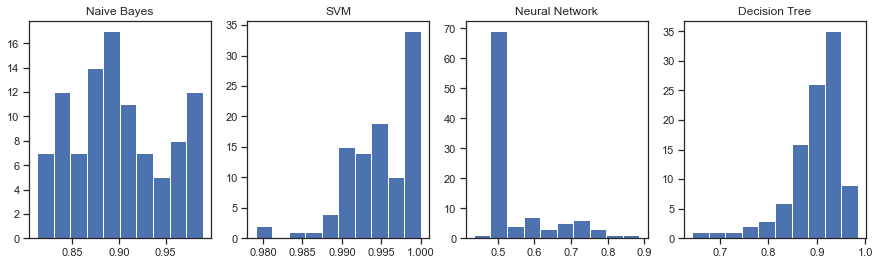

In [12]:
# Plot distribution of accuracy for ensemble
def plot_clf_results(clf_results):
    fig = plt.figure(figsize=(15,4))
    idx = 1
    for title, accs in clf_results.items():
        plt.subplot(1,4,idx)
        plt.hist(accs)
        plt.title(title)
        idx +=1 

# Return prediction with highest vote (count)
def accs_majority_vote(clf_results):
    idx = 1
    for title, accs in clf_results.items():
        h = np.histogram(accs)
        score = h[1][h[0].argmax()]
        print('{title} Accuracy (majority vote): {score}'.format(
                title=title,
                score=score) ) 

clf_results = {"Naive Bayes":accs_nb, "SVM":accs_svc, "Neural Network":accs_nn, 
               "Decision Tree":accs_dt}

print("Subset sample size: " + str(n_rows))
plot_clf_results(clf_results)
accs_majority_vote(clf_results)

### Report 10-fold CV performances of the ensembles with a sub sample ratio of 0.1 and 0.001.    

In [13]:
def evaluate_ensemble(_ensemble, _X, _y, _n_rows, text=''):
    accs = []
    kf = StratifiedKFold(n_splits=10, shuffle=False)
    for train_idx, test_idx in kf.split(_X, _y):
        ensemble = ensemble_fit(_ensemble, _X[train_idx], _y[train_idx], _n_rows)
        ensemble_accs = ensemble_predict(_ensemble, _X[test_idx], _y[test_idx])
        h = np.histogram(ensemble_accs)
        accs.append(h[1][h[0].argmax()])
    return np.mean(accs)

X = np.array(df.drop(columns=col_class))
y = np.array(df[col_class])

In [14]:
n_rows = int(X_train.shape[0] * 0.1)
print(f'Ensemble Naive Bayes (0.1 subsample) Stratified 10-fold CV acc={evaluate_ensemble(nb, X, y, n_rows):.3f}')
print(f'Ensemble SVC (0.1 subsample) Stratified 10-fold CV acc={evaluate_ensemble(svc, X, y, n_rows):.3f}')
print(f'Ensemble Neural Network (0.1 subsample) Stratified 10-fold CV acc={evaluate_ensemble(nn, X, y, n_rows):.3f}')
print(f'Ensemble Decision Tree (0.1 subsample) Stratified 10-fold CV acc={evaluate_ensemble(dt, X, y, n_rows):.3f}')
print(f'Regular Decision Tree (0.1 subsample) Stratified 10-fold CV acc={evaluate_ensemble([DecisionTreeClassifier()], X, y, n_rows):.3f}')

Ensemble Naive Bayes (0.1 subsample) Stratified 10-fold CV acc=0.828
Ensemble SVC (0.1 subsample) Stratified 10-fold CV acc=0.927
Ensemble Neural Network (0.1 subsample) Stratified 10-fold CV acc=0.479
Ensemble Decision Tree (0.1 subsample) Stratified 10-fold CV acc=0.886
Regular Decision Tree (0.1 subsample) Stratified 10-fold CV acc=0.958


In [15]:
n_rows = int(X_train.shape[0] * 0.001)
print(f'Ensemble Naive Bayes (0.001 subsample) Stratified 10-fold CV acc={evaluate_ensemble(nb, X, y, n_rows):.3f}')
print(f'Ensemble SVC (0.001 subsample) Stratified 10-fold CV acc={evaluate_ensemble(svc, X, y, n_rows):.3f}')
print(f'Ensemble Neural Network (0.001 subsample) Stratified 10-fold CV acc={evaluate_ensemble(nn, X, y, n_rows):.3f}')
print(f'Ensemble Decision Tree (0.001 subsample) Stratified 10-fold CV acc={evaluate_ensemble(dt, X, y, n_rows):.3f}')
print(f'Regular Decision Tree (0.001 subsample) Stratified 10-fold CV acc={evaluate_ensemble([DecisionTreeClassifier()], X, y, n_rows):.3f}')

Ensemble Naive Bayes (0.001 subsample) Stratified 10-fold CV acc=0.620
Ensemble SVC (0.001 subsample) Stratified 10-fold CV acc=0.827
Ensemble Neural Network (0.001 subsample) Stratified 10-fold CV acc=0.467
Ensemble Decision Tree (0.001 subsample) Stratified 10-fold CV acc=0.627
Regular Decision Tree (0.001 subsample) Stratified 10-fold CV acc=0.707


### Compare 10-fold CV performances of the ensembles for the training subsample ratios of (0.0005, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1) against the regular classifiers

In [18]:
ratios = [0.0005, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1]

accs_nb, accs_svc, accs_nn, accs_dt = [], [], [], []
reg_accs_nb, reg_accs_svc, reg_accs_nn, reg_accs_dt = [], [], [], []

for ratio in ratios:
    n_rows = int(X_train.shape[0] * ratio)
    
    # Ensembles
    accs_nb.append(evaluate_ensemble(nb, X, y, n_rows))
    accs_svc.append(evaluate_ensemble(svc, X, y, n_rows))
    accs_nn.append(evaluate_ensemble(nn, X, y, n_rows))
    accs_dt.append(evaluate_ensemble(dt, X, y, n_rows))
    
    # Regular Models
    reg_accs_nb.append(evaluate_ensemble([GaussianNB()], X, y, n_rows))
    reg_accs_svc.append(evaluate_ensemble([SVC(kernel='linear', probability=True)], X, y, n_rows))
    reg_accs_nn.append(evaluate_ensemble([MLPClassifier()], X, y, n_rows))
    reg_accs_dt.append(evaluate_ensemble([DecisionTreeClassifier()], X, y, n_rows))
    
    print("Completed eval given Ratio: " + str(ratio) )
    

Completed eval given Ratio: 0.0005
Completed eval given Ratio: 0.001
Completed eval given Ratio: 0.005
Completed eval given Ratio: 0.01
Completed eval given Ratio: 0.03
Completed eval given Ratio: 0.05
Completed eval given Ratio: 0.1


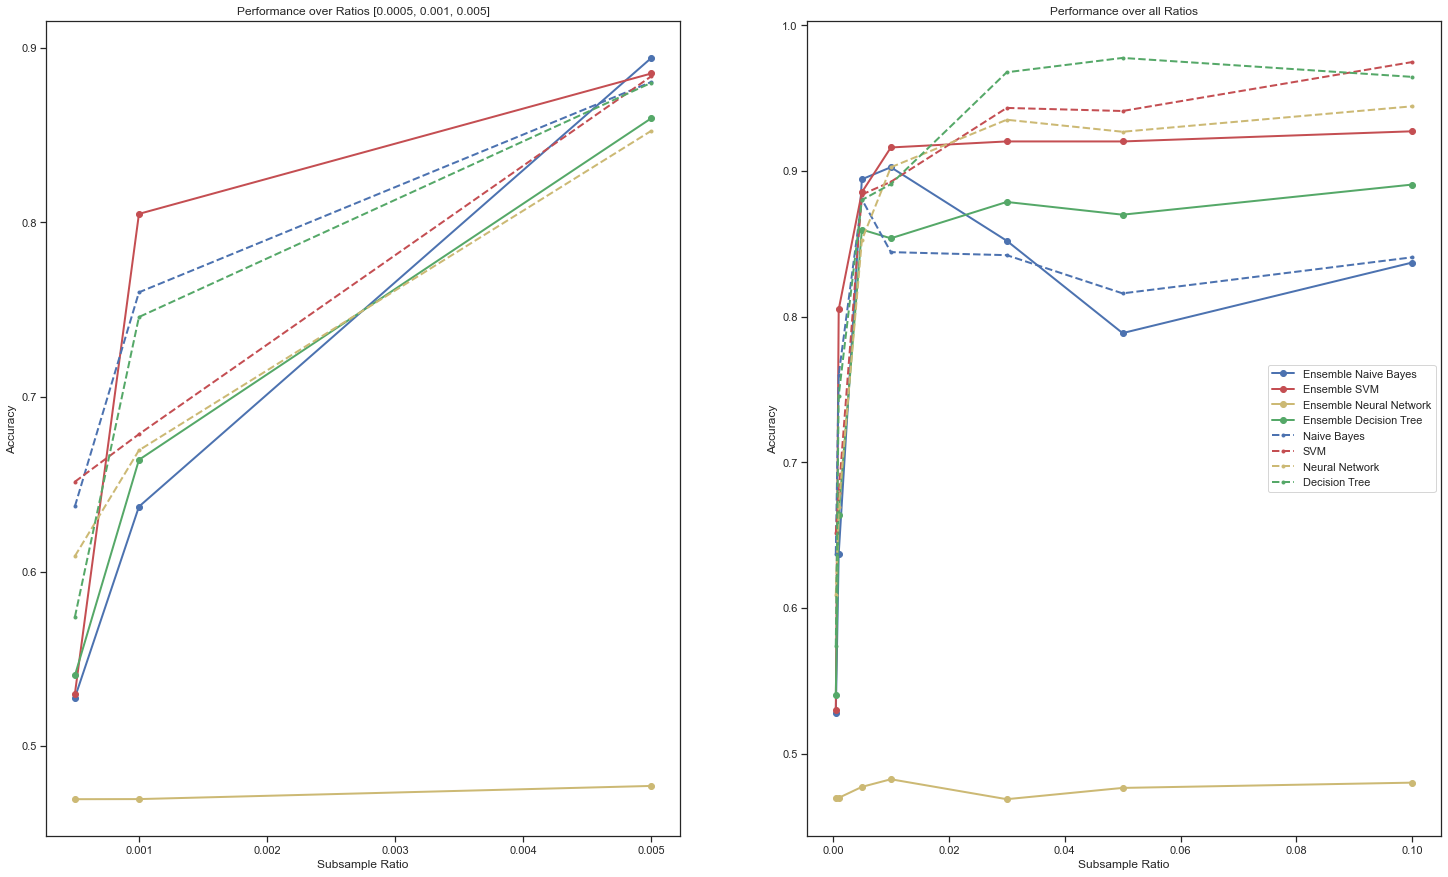

In [19]:
ensemble_results = {"Ensemble Naive Bayes":accs_nb, "Ensemble SVM":accs_svc, "Ensemble Neural Network":accs_nn, 
               "Ensemble Decision Tree":accs_dt}

regular_results = {"Naive Bayes":reg_accs_nb, "SVM":reg_accs_svc, "Neural Network":reg_accs_nn, 
               "Decision Tree":reg_accs_dt}

colors = ['b','r','y','g']
fig = plt.figure(figsize=(25,15))

# Plot Ensemble model results
idx = 0
for key, value in ensemble_results.items():
    plt.subplot(1,2,1)
    plt.plot(ratios[:3], value[:3], colors[idx], label=key, marker='o', linewidth=2)
    plt.title("Performance over Ratios [0.0005, 0.001, 0.005]")
    plt.xlabel('Subsample Ratio')
    plt.ylabel('Accuracy')
    plt.subplot(1,2,2)
    plt.plot(ratios, value, colors[idx], label=key, marker='o', linewidth=2)
    plt.title("Performance over all Ratios")
    plt.xlabel('Subsample Ratio')
    plt.ylabel('Accuracy')
    idx += 1

# Plot regular model results
idx = 0 
for key, value in regular_results.items():
    plt.subplot(1,2,1)
    plt.plot(ratios[:3], value[:3], colors[idx],  label=key, marker='.', linestyle='dashed', linewidth=2)
    plt.subplot(1,2,2)
    plt.plot(ratios, value, colors[idx],  label=key, marker='.', linestyle='dashed', linewidth=2)
    idx += 1

plt.legend()
plt.show()

__*Note__, left chart shows ratio interval [0.0005, 0.001, 0.005] and right chart shows entire range of ratios

__Observations__:
* Left plot shows (on average) Ensemble models perform better than the associated regular models given a low subsample ratio. The increase in performance is attributed to the ensemble's ability to evaluate on multiple subsamples. 
* Right plot show ensembles entail a lower standard deviation (variance/volatility) in accuracy score as the subsample ratio increases. For example, viewing the above plot, 'Ensembles Decision tree', 'Ensemble SVM' and 'Ensemble Neural Network' plateau in accuracy earlier than their regular models
* Ensemble Decision tree plateaus in accuracy while the regular decision tree increases with ratio size. Said effect is attributed to tuning parameters - max_depth=5 and max_features=5. Results allude ensemble decision tree is more generalized or underfit in comparison to a regular decision tree
* Ensemble Neural Network plateaus in performance regardless of subsample ratio while regular neural network improves. However, note the regular neural network does not account for tuning parameters set on the ensemble neural network.